# Mushroom Project

In [1]:
#importing all the libraries
import numpy as np  #importing numpy
import pandas as pd       #importing pandas 
import seaborn as sns    # importing seaborn lib
import matplotlib.pyplot as plt # importing matplotlib
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv", index_col=False) #reading csv raw data
data.head()  # printing the first rows

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
data.columns              # printing the column names

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [3]:
print("The number of rows:", len(data))       #printing the number of rows 
print("The number of columns:" ,len(data.columns))          #printing the number of columns

The number of rows: 8124
The number of columns: 23


* This shows that our dataset contains 8124 rows which indicate number of mushrooms and 23 columns which  tells about specifications like cap-shape, cap-surface, cap-color, bruises, odor, gill-size, etc.

In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


* count shows the number of responses.
* unique shows the number of unique categorical values.
* top shows the highest-occurring categorical value.
* freq shows the frequency/count of the highest-occurring categorical value

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

* This method gives concise summary of the DataFrame, it prints information about the DataFrame including the index dtype and column dtypes, non-null values, and memory usage

In [5]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

* There are no nulls in the given data frame

In [7]:
data['class'].unique()

array(['p', 'e'], dtype=object)

* There are two unique class  names namely p=poisonous and e=edible

In [8]:
data['class'].value_counts()     # Count of the unique occurrences of ‘class’ column

e    4208
p    3916
Name: class, dtype: int64

* As we can see, there are 4208 occurrences of edible mushrooms and 3916 occurrences of poisonous mushrooms in the dataset.

<AxesSubplot:title={'center':'Number of poisonous/edible mushrooms'}, xlabel='class', ylabel='Count'>

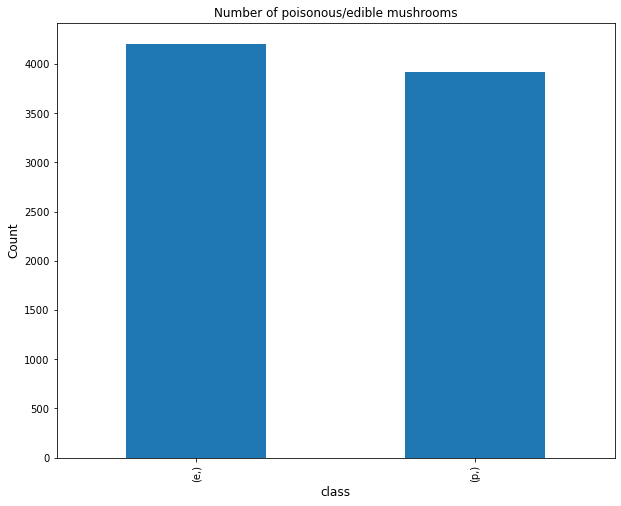

In [6]:
plt.figure(figsize=(10,8)) 
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
data[['class']].value_counts().plot(kind="bar")

* Bar plot to visualize the count of edible and poisonous mushrooms

In [7]:
df = data.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

* We can see, our columns are now of type ‘category’ type so We can now use LabelEncoder to convert categorical values to ordinal.

In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


* The data set is now converted into numeric data set

In [10]:
df['veil-type']

0       p
1       p
2       p
3       p
4       p
       ..
8119    p
8120    p
8121    p
8122    p
8123    p
Name: veil-type, Length: 8124, dtype: category
Categories (1, object): ['p']

In [42]:
df = data.drop(["veil-type"],axis=1)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


* As the veil-type is contained only value '0' so we have dropped it from the data set

#### Correlation between the variables

<AxesSubplot:>

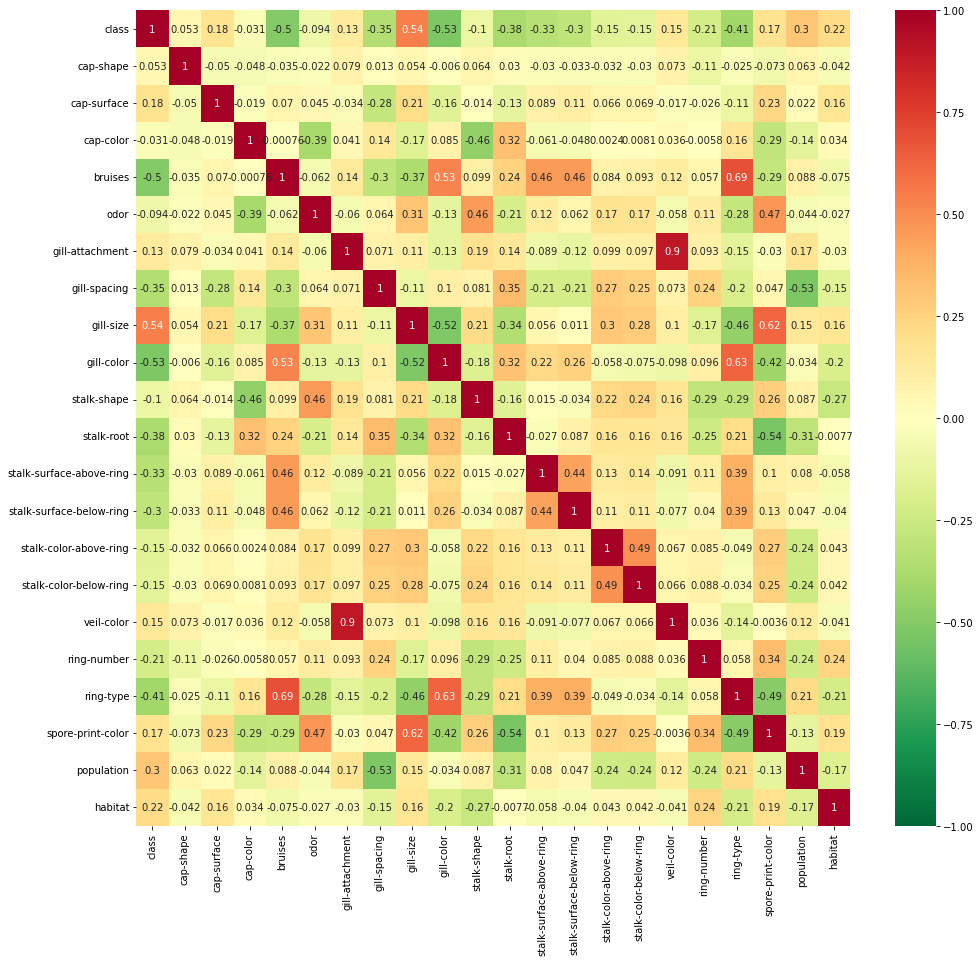

In [125]:
plt.figure(figsize=(16, 15))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn_r', vmax=1,vmin=-1, center=0)
                                                                              

* From the heatmap we can assume that 'veil-color' has the strong positive correlation with "gill-attachment" 

In [103]:
from sklearn.model_selection import train_test_split
x = data.drop(["class"], axis=1).values    # All data except "class" column.
y = data["class"].values       # "class" column as numpy array.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)  ## Split data for train and test.

#### Logistic Regression Classification

In [104]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(lr.score(x_test,y_test)*100,2)))

Test Accuracy: 94.65%


#### Decision Tree Classification

In [99]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(dt.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


#### KNN Classification

In [100]:
from sklearn.neighbors import KNeighborsClassifier

best_Kvalue = 0
best_score = 0

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
        best_score = knn.score(x_train,y_train)
        best_Kvalue = i

print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue, round(best_score*100,2)))


Best KNN Value: 1
Test Accuracy: 100.0%


#### SV Classification

In [101]:
from sklearn.svm import SVC

svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(svm.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


#### Naive classification

In [102]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(nb.score(x_test,y_test)*100,2)))
x = df["class"].values
y = df.drop(["class"], axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)


Test Accuracy: 92.18%


#### Random Classification

In [119]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


#### Confusion matrix

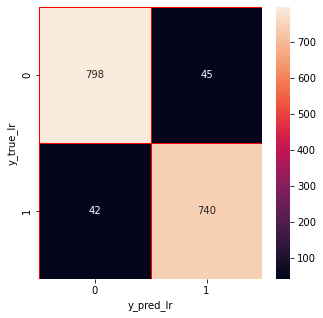

In [120]:
from sklearn.metrics import confusion_matrix
# Linear Regression
y_pred_lr = lr.predict(x_test)
y_true_lr = y_test
cm = confusion_matrix(y_true_lr, y_pred_lr)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()

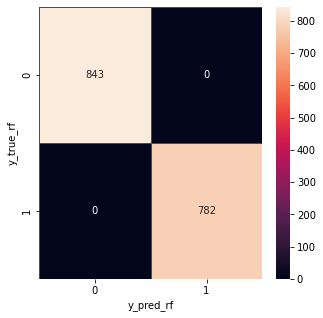

In [122]:
# Random Forest
y_pred_rf = rf.predict(x_test)
y_true_rf = y_test
cm = confusion_matrix(y_true_rf, y_pred_rf)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rf")
plt.ylabel("y_true_rf")
plt.show()

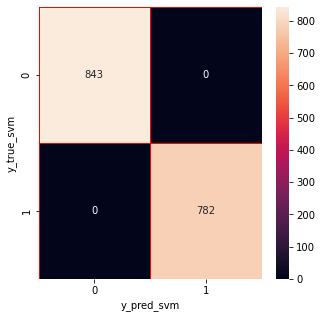

In [127]:
# SVM Forest
y_pred_sv = svm.predict(x_test)
y_true_sv = y_test
cm = confusion_matrix(y_true_sv, y_pred_sv)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_svm")
plt.ylabel("y_true_svm")
plt.show()

* Conclusion: From the confusion matrix, we saw that our train and test data is balanced. Most of classfication methods hit 100% accuracy with this dataset.